In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
% cd /content/gdrive/My Drive/cv_workshop/data/deep_learning

/content/gdrive/.shortcut-targets-by-id/1IAj9sMph-gTN-Mw0balHLZA5QQ2XOmwZ/cv_workshop/data/deep_learning


In [ ]:
! ls

test  train


# Eksplorasi Data

In [ ]:
import os

for dirpath, dirnames, filenames in os.walk('.'):
  print(f"Ada {len(dirnames)} folder dan ada {len(filenames)} gambar di dalam {dirpath}")

Ada 2 folder dan ada 0 gambar di dalam .
Ada 4 folder dan ada 0 gambar di dalam ./test
Ada 0 folder dan ada 10 gambar di dalam ./test/dorami
Ada 0 folder dan ada 10 gambar di dalam ./test/pikachu
Ada 0 folder dan ada 10 gambar di dalam ./test/spongebob
Ada 0 folder dan ada 10 gambar di dalam ./test/tweety
Ada 4 folder dan ada 0 gambar di dalam ./train
Ada 0 folder dan ada 145 gambar di dalam ./train/pikachu
Ada 0 folder dan ada 281 gambar di dalam ./train/tweety
Ada 0 folder dan ada 156 gambar di dalam ./train/spongebob
Ada 0 folder dan ada 142 gambar di dalam ./train/dorami


In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path('train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['dorami' 'pikachu' 'spongebob' 'tweety']


In [ ]:
# view image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image Shape : {img.shape}")
  return img

Image Shape : (2715, 1920, 3)


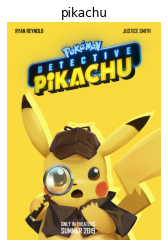

In [ ]:
img = view_random_image(target_dir='./train/',
                        target_class='pikachu')

## Image Data Generator

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(46)

# preprocess data
train_datagen = ImageDataGenerator(rescale=1/255.0)
valid_datagen = ImageDataGenerator(rescale=1/255.0)

# train dengan augmentasi
train_datagen_augmented = ImageDataGenerator(rescale=1/255.0,
                                             rotation_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_dir = 'train/'
test_dir = 'test/'

# set data generator
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=16,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               seed=46)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               batch_size=16,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               seed=46)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=16,
                                               target_size=(224, 224),
                                               class_mode='categorical',
                                               seed=46)

Found 724 images belonging to 4 classes.
Found 724 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


In [ ]:
# buat model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(16, 3, activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPool2D(2))
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPool2D(2))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(4, activation='softmax'))

# model compile
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_data_augmented,
                    epochs=30,
                    validation_data=valid_data)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/30
46/46 [==============================] - 21s 441ms/step - loss: 1.3681 - accuracy: 0.3522 - val_loss: 1.4368 - val_accuracy: 0.2500
Epoch 2/30
46/46 [==============================] - 20s 434ms/step - loss: 1.3043 - accuracy: 0.4116 - val_loss: 1.2556 - val_accuracy: 0.2750
Epoch 3/30
46/46 [==============================] - 20s 438ms/step - loss: 1.2188 - accuracy: 0.4641 - val_loss: 1.3036 - val_accuracy: 0.3750
Epoch 4/30
46/46 [==============================] - 20s 431ms/step - loss: 1.1193 - accuracy: 0.5097 - val_loss: 0.9295 - val_accuracy: 0.5250
Epoch 5/30
46/46 [==============================] - 20s 424ms/step - loss: 0.9997 - accuracy: 0.5401 - val_loss: 0.8665 - val_accuracy: 0.5750
Epoch 6/30
46/46 [==============================] - 19s 422ms/step - loss: 0.9624 - accuracy: 0.5884 - val_loss: 0.8823 - val_accuracy: 0.6500
Epoch 7/30
46/46 [==============================] - 19s 419ms/step - loss: 0.9548 - accuracy: 0.6146 - val_loss: 0.6867 - val_accuracy: 0.8000

In [ ]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(loss))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title("Loss Curves")
  plt.xlabel("Epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title("Accuracy Curves")
  plt.xlabel("Epochs")
  plt.legend()

Base Model


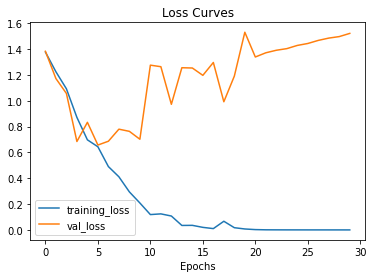

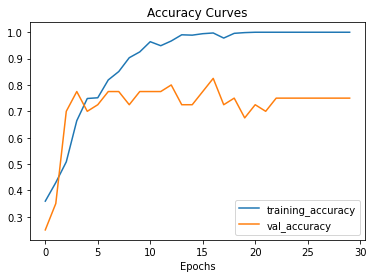

In [ ]:
print("Base Model")
plot_loss_curves(history)

Augmented Dataset Model


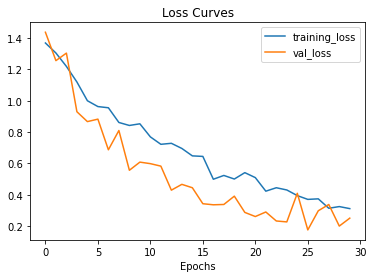

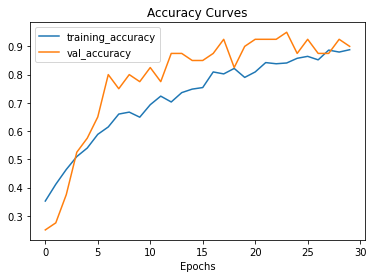

In [ ]:
print("Augmented Dataset Model")
plot_loss_curves(history)

In [ ]:
from sklearn.metrics import classification_report
res = model.predict(valid_data)
y_test = valid_data.classes
res = res.argmax(axis=1)
print(classification_report(y_test, res))

(-0.5, 223.5, 223.5, -0.5)

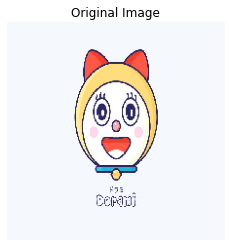

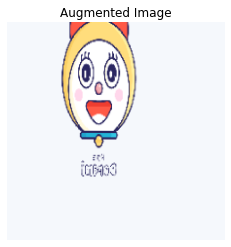

In [ ]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()
random_number = random.randint(0, 5)
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis(False)

### Transfer Learning / Fine Tuning

In [ ]:
base_model = tf.keras.applications.resnet_v2.ResNet50V2(input_shape=(224, 224, 3),
                                                        include_top=False,
                                                        weights='imagenet')
base_model.trainable = False

94683136/94668760 [==============================] - 2s 0us/step


In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dropout, GlobalAveragePooling2D, Activation
from tensorflow.keras import Input, Model

global_average_layer = GlobalAveragePooling2D()
layer_1 = Dense(15, activation='relu')
prediction_layer = Dense(4)
softmax = Activation('softmax')

inputs = Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = global_average_layer(x)
x = Dropout(0.2)(x)
x = layer_1(x)
outputs = prediction_layer(x)
outputs = softmax(outputs)

model = Model(inputs, outputs)

# compile model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# train model
history = model.fit(train_data,
                    epochs=30,
                    validation_data=valid_data)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/30
46/46 [==============================] - 20s 330ms/step - loss: 0.8836 - accuracy: 0.6713 - val_loss: 0.6523 - val_accuracy: 0.7500
Epoch 2/30
46/46 [==============================] - 13s 277ms/step - loss: 0.4271 - accuracy: 0.8785 - val_loss: 0.4308 - val_accuracy: 0.8250
Epoch 3/30
46/46 [==============================] - 13s 280ms/step - loss: 0.2845 - accuracy: 0.9061 - val_loss: 0.3627 - val_accuracy: 0.9000
Epoch 4/30
46/46 [==============================] - 13s 281ms/step - loss: 0.1966 - accuracy: 0.9489 - val_loss: 0.3436 - val_accuracy: 0.9250
Epoch 5/30
46/46 [==============================] - 13s 280ms/step - loss: 0.1395 - accuracy: 0.9599 - val_loss: 0.2207 - val_accuracy: 0.9000
Epoch 6/30
46/46 [==============================] - 13s 284ms/step - loss: 0.1212 - accuracy: 0.9669 - val_loss: 0.1991 - val_accuracy: 0.9000
Epoch 7/30
46/46 [==============================] - 13s 278ms/step - loss: 0.0939 - accuracy: 0.9751 - val_loss: 0.2765 - val_accuracy: 0.9000

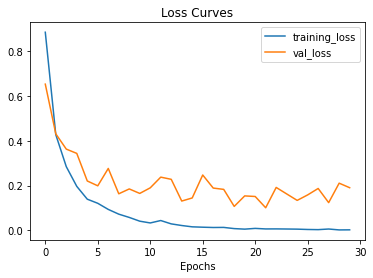

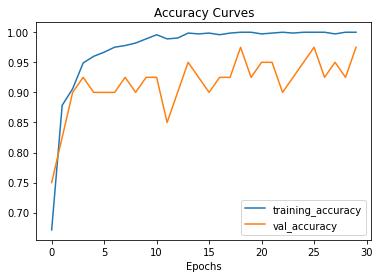

In [ ]:
plot_loss_curves(history)

In [ ]:
val_data = valid_data.next()

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
res = model.predict(val_data[0])
y_test = np.array(val_data[1]).argmax(axis=1)
res = res.argmax(axis=1)
print(classification_report(y_test, res))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         3

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

